In [2]:
import numpy as np

In [3]:
n_neurons = 10
n_ts = 100
n_reps  = 5
lr_h = 0.001
lr_J = 0.001

J = np.random.normal(0,1,size=(n_neurons,n_neurons))
h = np.random.normal(0,1,size=(n_ts,n_neurons))

X = np.random.choice([1,-1],size=(n_reps,n_ts,n_neurons))



# Module organization
- different model classes with a common interface
- different approximate fitting algorithms
- a stats class for statistical analysis (words, counts, roudi relevance etc..)
- tools for bootstrapping and cross validation and significance testing
- tools for visualization ?
- interfaces for different kinds of neural data

In [ ]:
# comment this notebook more, to be used for 
# organize this in a class and put it in a module

# NEXT STEPS
# ising model simulator
# sute it on arie's data
# plan library for escience center module

# Log likelihood:
Transition prbability:

$$P(s(t+1)|s(t))= \prod_{i}\frac{\exp(s_{i}(t+1)\theta_{i}(t))}{2 \cosh (\theta_{i}(t))}$$ 
with 
$$\theta_{i}(t) = h_{i}(t) +\sum_{j} J_{ij} s_{j}(t) $$

Log-likelihood
$$LL =<\log P(s(t+1)|s(t))>_{r,t} =\sum_{i}<s_{i}(t+1)\theta_{i}(t)>-<\log(2\cosh(\theta_{i}(t)))>$$

Update equations:

$$\delta h_{i}(t) = \eta_{h}[<s_{i}(t+1)>_{r} - <\tanh[\theta_{i}(t)]>_{r}]$$
$$\delta J_{ij}(t) = \eta_{J}[<s_{i}(t+1)s_{j}(t)> - <\tanh[\theta_{i}(t)]s_{j}(t)>]$$

In [26]:
def log_likelihood(X,h,J):
    theta = np.stack([h for _ in range(len(X))]) + np.einsum('ij,rtj->rtj',J,X)
    ll = np.mean(np.einsum('ijk,ijm->ijkm',X[:,1:],theta[:,:-1])) - np.mean(np.log(2*np.cosh(theta)))
    return ll

def compute_deltas(X,h,J):
    S = np.mean(X,axis=0)[1:]
    D = np.mean(np.einsum('ijk,ijm->ijkm',X[:,1:],X[:,:-1]),axis=(0,1))
    theta = np.stack([h for _ in range(len(X))]) + np.einsum('ij,rtj->rtj',J,X)

    dh = S - np.mean(np.tanh(theta[:,:-1]),axis=0)
    # add a line of zeros at the end of dh for shape consistency. The last h is meaningless
    dh = np.vstack([dh,np.zeros((dh.shape[-1]))])
    dJ = D- np.mean(np.einsum('rti,rtj->rtij',np.tanh(theta[:,:-1]),X[:,:-1]),axis=(0,1))

    return dh,dJ


In [43]:
n_neurons = 50
n_ts = 100
n_reps  = 5
lr_h = 0.1
lr_J = 0.1

J = np.random.normal(0,1,size=(n_neurons,n_neurons))
h = np.random.normal(0,1,size=(n_ts,n_neurons))

X = np.random.choice([1,-1],size=(n_reps,n_ts,n_neurons))


steps = 200
ll = [log_likelihood(X,h,J)]
for s in range(steps):
    dh,dJ = compute_deltas(X,h,J)
    # how do we deal with the edge case?
    h = h + lr_h*dh
    J = J + lr_J*dJ
    ll.append(log_likelihood(X,h,J))


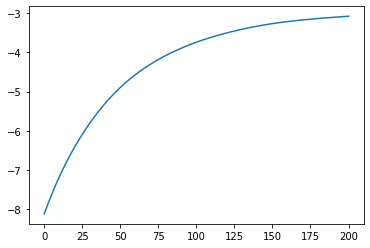

In [44]:
plt.plot(ll)

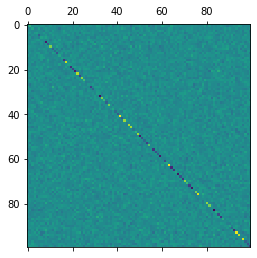

In [45]:
import matplotlib.pyplot as plt
plt.matshow(J)

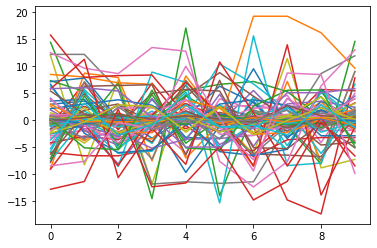

In [50]:
plt.plot(h[:10])

(array([2.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 7.100e+01,
        5.470e+02, 2.035e+03, 3.599e+03, 2.641e+03, 9.030e+02, 1.250e+02,
        1.000e+01, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([-19.0514436 , -17.75066696, -16.44989033, -15.14911369,
        -13.84833706, -12.54756042, -11.24678379,  -9.94600715,
         -8.64523052,  -7.34445388,  -6.04367725,  -4.74290061,
         -3.44212398,  -2.14134734,  -0.84057071,   0.46020593,
          1.76098257,   3.0617592 ,   4.36253584,   5.66331247,
          6.96408911,   8.26486574,   9.56564238,  10.86641901,
         12.16719565,  13.46797228,  14.76874892,  16.06952555,
         17.37030219,  18.67107882,  19.97185546]),
 <BarContainer object of 30 artists>)

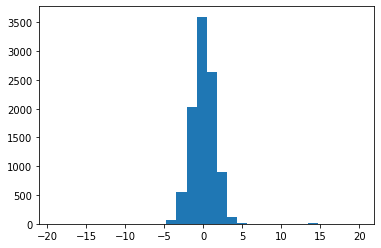

In [48]:
plt.hist(J.ravel(),bins=30)

In [6]:
S = np.mean(X,axis=0)[1:]
D = np.mean(np.einsum('ijk,ijm->ijkm',X[:,1:],X[:,:-1]),axis=(0,1))
theta = np.stack([h for _ in range(len(X))]) + np.einsum('ij,rtj->rtj',J,X)

dh = lr_h*(S - np.mean(np.tanh(theta[:,:-1]),axis=0))
dJ = lr_J*(D- np.mean(np.einsum('rti,rtj->rtij',np.tanh(theta[:,:-1]),X[:,:-1]),axis=(0,1)))

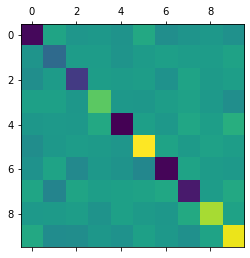

In [7]:
import matplotlib.pyplot as plt
plt.matshow(dJ)

In [129]:
prova = np.mean(np.einsum('rti,rtj->rtij',np.tanh(theta[:,:-1]),X[:,:-1]),axis=(0,1))
prova.shape

(10, 10)

In [119]:
a = np.tanh(theta[:,:-1])
print(a.shape)
b = X[:,:-1]
print(b.shape)

(5, 99, 10)
(5, 99, 10)
